You need to submit 3 line charts and 3 step charts using Tableau or PowerBI, Python and R using the data below (or your own datasets). You can also submit using D3, though not required. You can choose which library to use in Python or R, documentation is provided to help you decide and as you start to play around in the libraries, you will decide which you prefer.

In [1]:
# Import required packages
library('magrittr')

# Import data to be used for visualization
fileData1 = paste(getwd(), '/world-population.xlsm', sep = '')
population = xlsx::read.xlsx(fileData1, sheetIndex = 1, stringsAsFactors = FALSE)

fileData2 = paste(getwd(), '/AEP_hourly.csv', sep = '')
aep = read.csv2(fileData2, sep=',', stringsAsFactors = FALSE) %>% 
        as.data.frame()

fileData3 = paste(getwd(), '/Sample - Superstore.xlsx', sep = '')
superstore = xlsx::read.xlsx(fileData3, sheetIndex = 1, stringsAsFactors = FALSE)

# Examine data
print(head(population))
print(head(aep))
print(head(superstore))

  Year Population
1 1960 3028654024
2 1961 3068356747
3 1962 3121963107
4 1963 3187471383
5 1964 3253112403
6 1965 3320396924
             Datetime  AEP_MW
1 2004-12-31 01:00:00 13478.0
2 2004-12-31 02:00:00 12865.0
3 2004-12-31 03:00:00 12577.0
4 2004-12-31 04:00:00 12517.0
5 2004-12-31 05:00:00 12670.0
6 2004-12-31 06:00:00 13038.0
  Row.ID       Order.ID Order.Date  Ship.Date      Ship.Mode Customer.ID
1      1 CA-2016-152156 2016-11-08 2016-11-11   Second Class    CG-12520
2      2 CA-2016-152156 2016-11-08 2016-11-11   Second Class    CG-12520
3      3 CA-2016-138688 2016-06-12 2016-06-16   Second Class    DV-13045
4      4 US-2015-108966 2015-10-11 2015-10-18 Standard Class    SO-20335
5      5 US-2015-108966 2015-10-11 2015-10-18 Standard Class    SO-20335
6      6 CA-2014-115812 2014-06-09 2014-06-14 Standard Class    BH-11710
    Customer.Name   Segment       Country            City      State
1     Claire Gute  Consumer United States       Henderson   Kentucky
2     Claire Gu

### World Population data
#### Line and Step graph

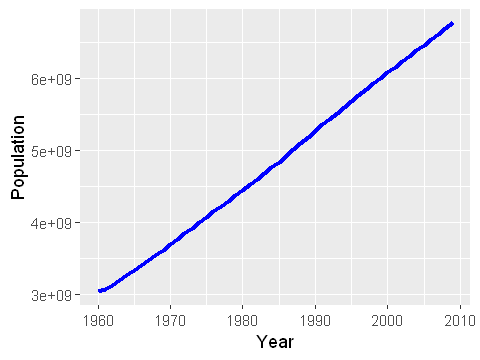

In [2]:
options(repr.plot.width = 4, repr.plot.height = 3)

ggplot2::ggplot(data=population, ggplot2::aes(x=Year, y=Population)) +
  ggplot2::geom_line(linetype='solid', color='blue', size=1.2)

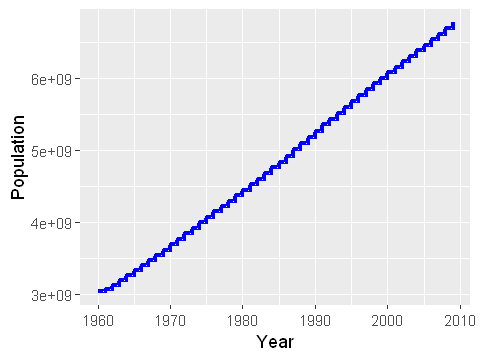

In [3]:
ggplot2::ggplot(data=population, ggplot2::aes(x=Year, y=Population)) +
  ggplot2::geom_step(linetype='solid', color='blue', size=1.2)

### AEP Data
#### Line and Step graph
For the AEP data, there are too many observations to put in a line plot. Hence I calculated the total of AEP_MW for each year and plotted them

In [4]:
# Prepare dataset
aep_aggr = aep %>%
  dplyr::mutate(Year = as.numeric(format(as.Date(Datetime), '%Y')),
                AEP_MW = as.numeric(AEP_MW)) %>% 
  dplyr::group_by(Year) %>% 
  dplyr::summarise(Total_MW = sum(AEP_MW))

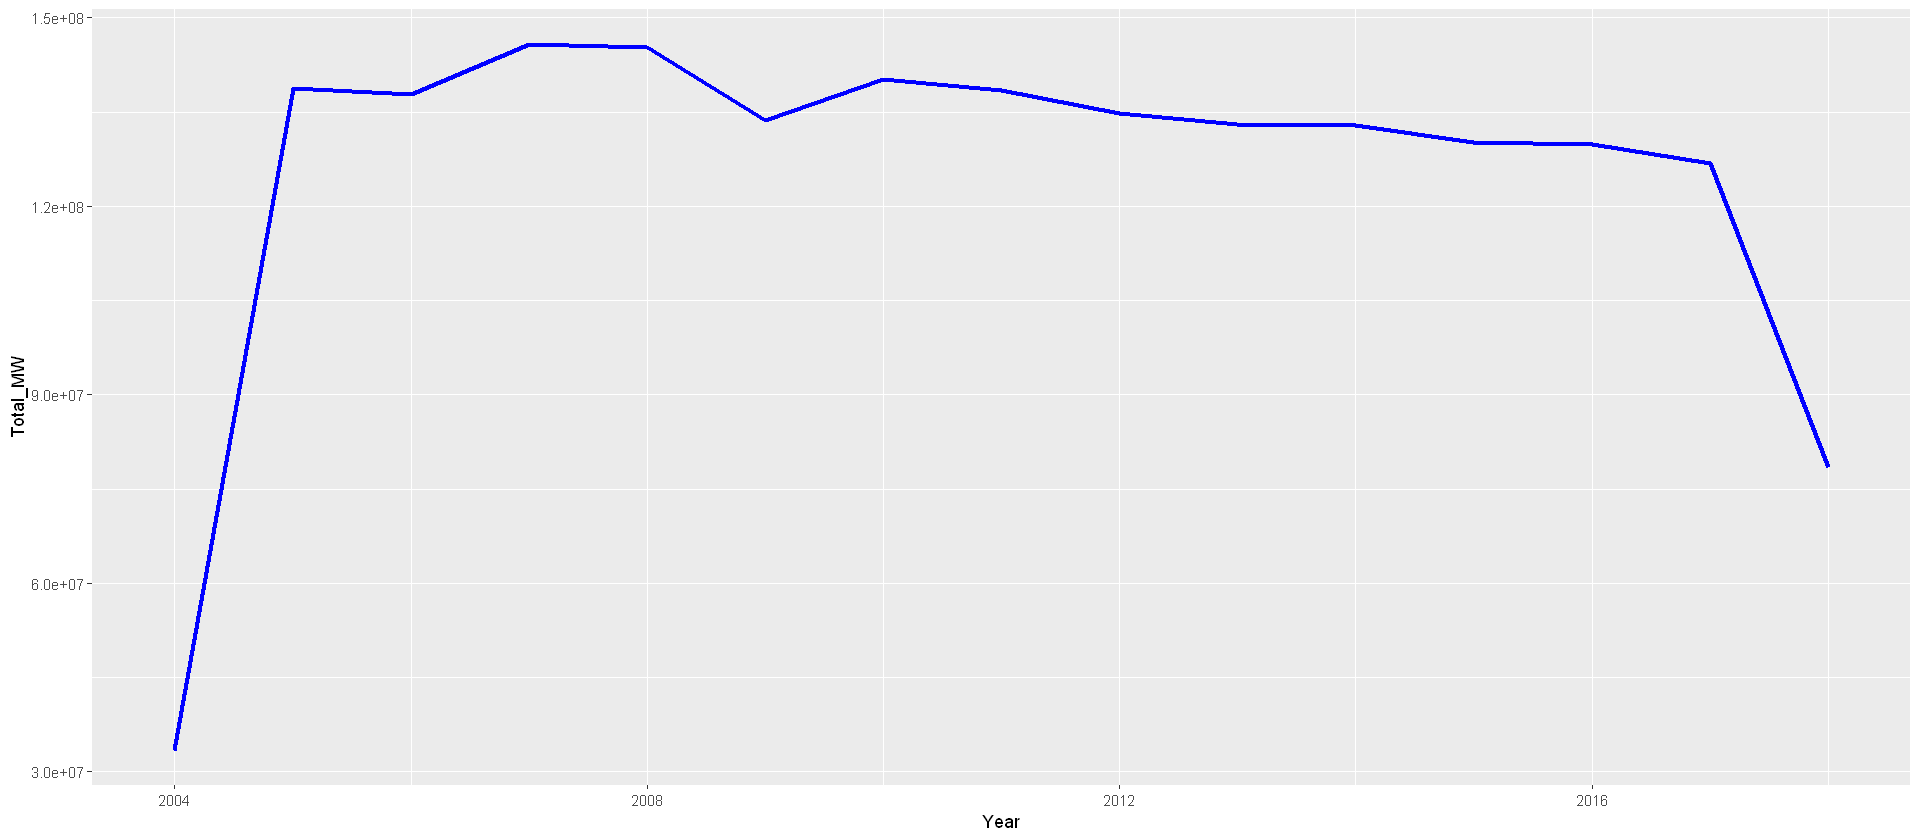

In [5]:
options(repr.plot.width = 16, repr.plot.height = 7)

ggplot2::ggplot(data=aep_aggr, ggplot2::aes(x=Year, y=Total_MW)) +
  ggplot2::geom_line(linetype='solid', color='blue', size=1.2)

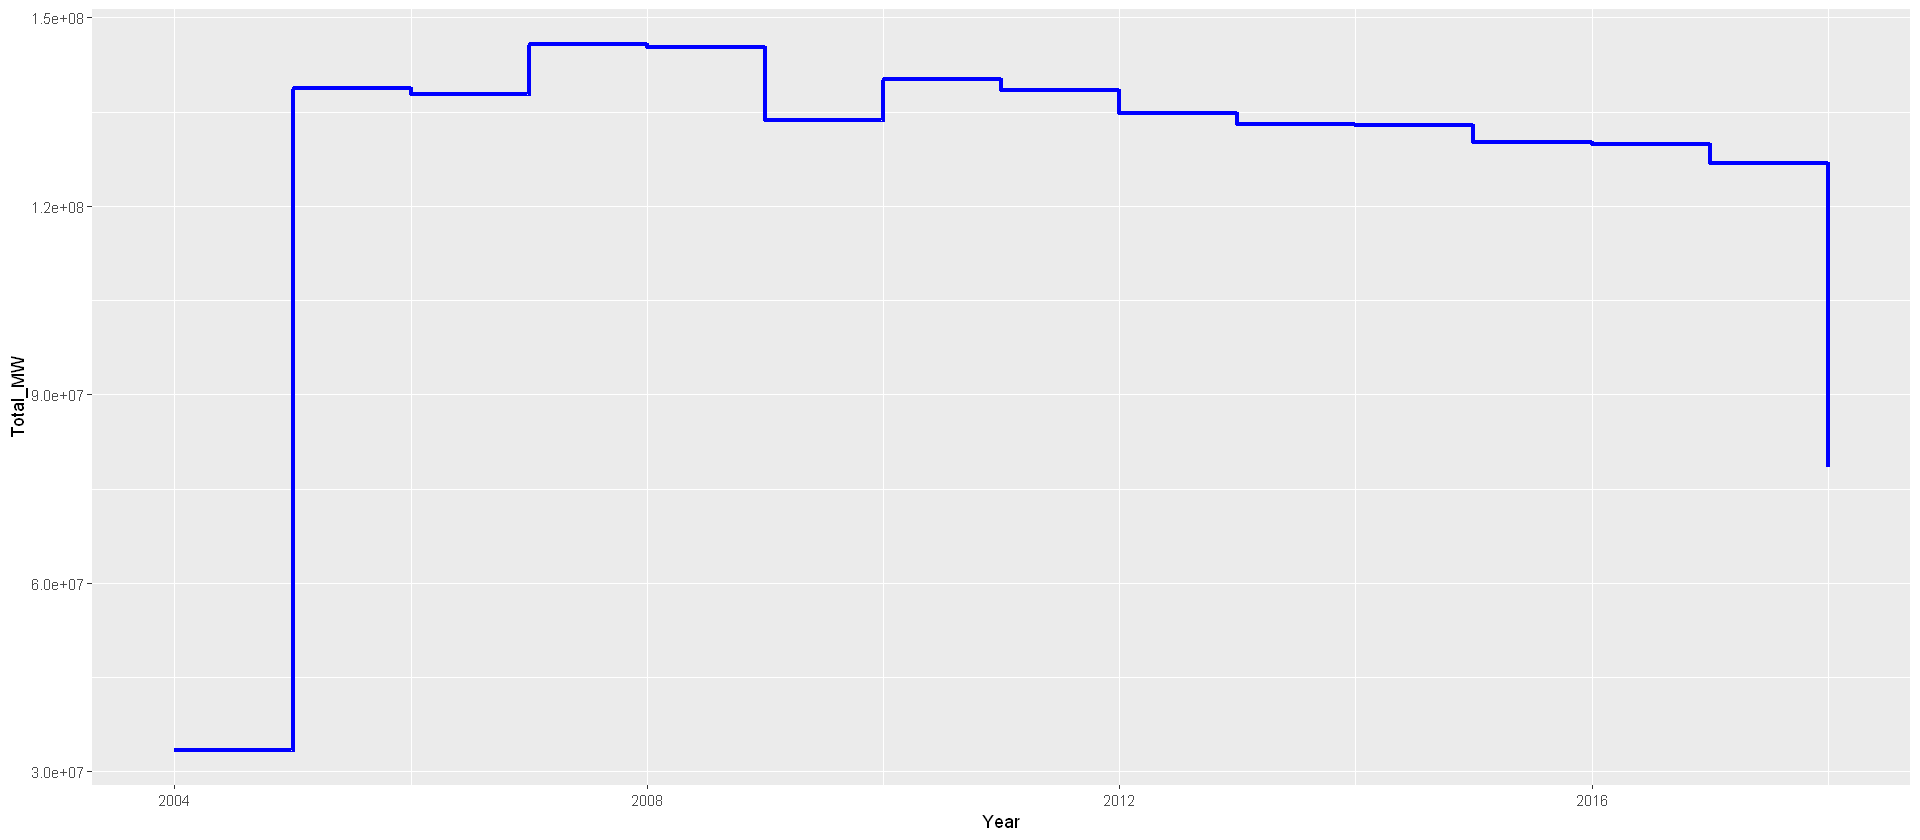

In [6]:
ggplot2::ggplot(data=aep_aggr, ggplot2::aes(x=Year, y=Total_MW)) +
  ggplot2::geom_step(linetype='solid', color='blue', size=1.2)

### Sample Superstore data
#### Line and Step graph
For this data set, I plan to plot the profit by order year and segment. This needs some additional data preparation as below.

In [7]:
superstorePrep = superstore %>% 
                  dplyr::mutate(OrderYear = as.numeric(format(as.Date(Order.Date), '%Y'))) %>% 
                  dplyr::select(OrderYear, Segment, Profit) %>% 
                  dplyr::group_by(OrderYear, Segment) %>% 
                  dplyr::summarise(TotalProfit = sum(Profit))

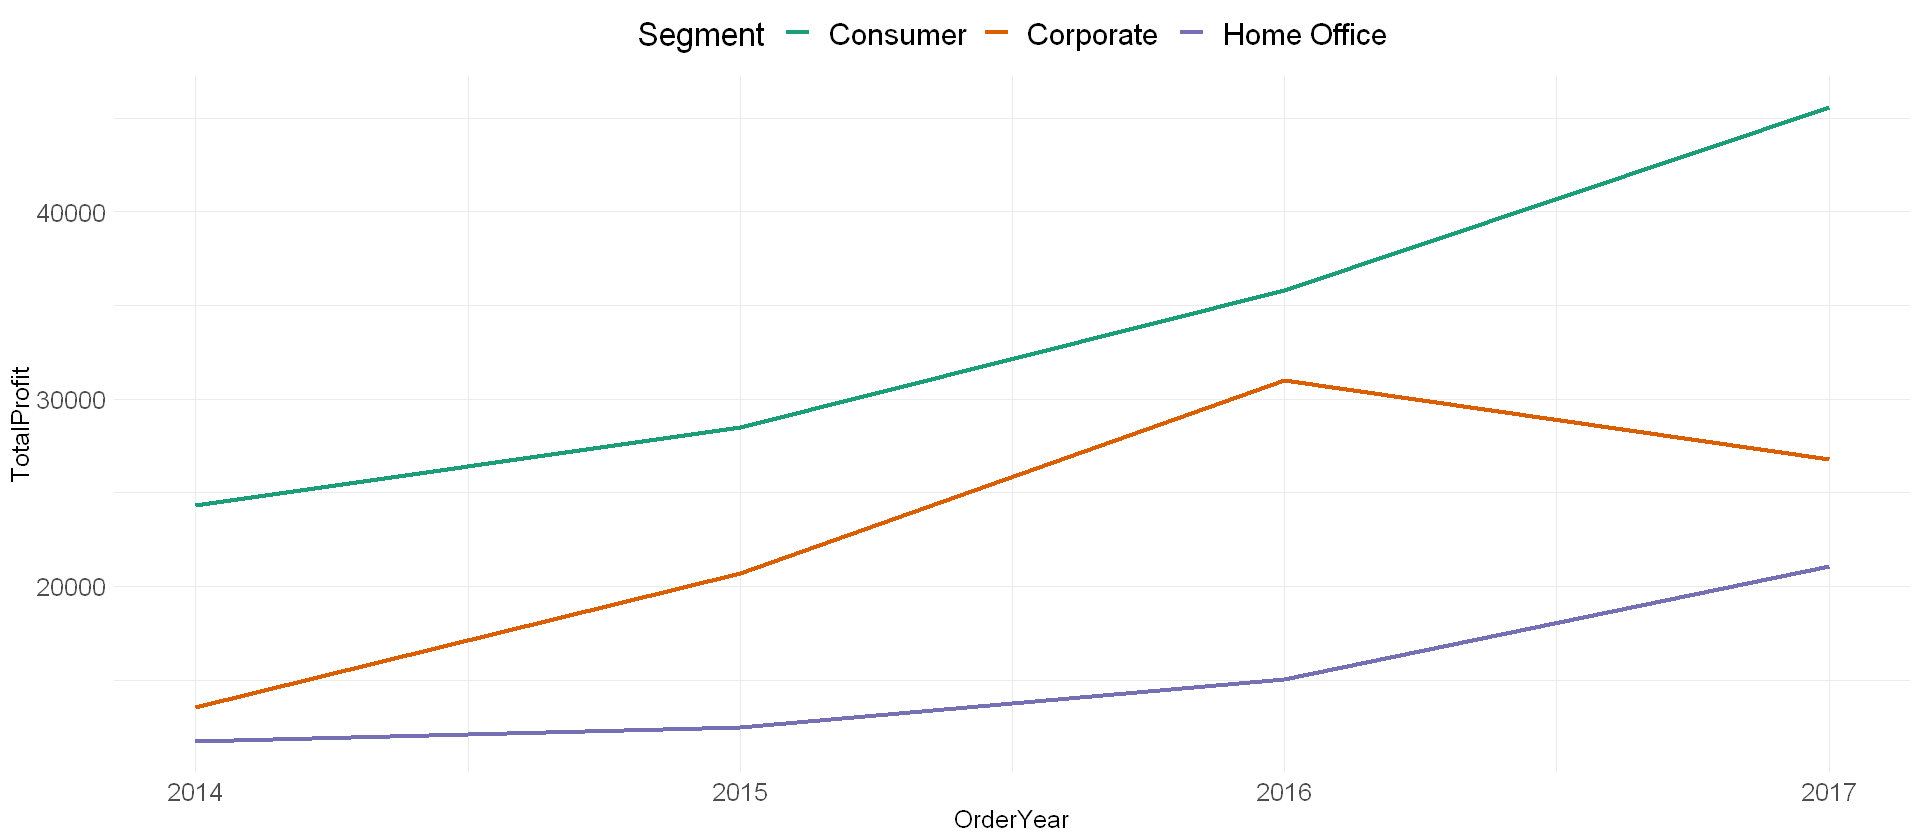

In [8]:
ggplot2::ggplot(data=superstorePrep, ggplot2::aes(x=OrderYear, y=TotalProfit, group=Segment)) +
    ggplot2::geom_line(linetype='solid', size=1.2, ggplot2::aes(color=Segment)) +
    ggplot2::scale_color_brewer(palette='Dark2') +
    ggplot2::theme_minimal() +
    ggplot2::theme(legend.position='top', 
                   legend.title=ggplot2::element_text(size=20), 
                   legend.text=ggplot2::element_text(size=18),
                   axis.text=ggplot2::element_text(size=15),
                   axis.title=ggplot2::element_text(size=15)
                  )

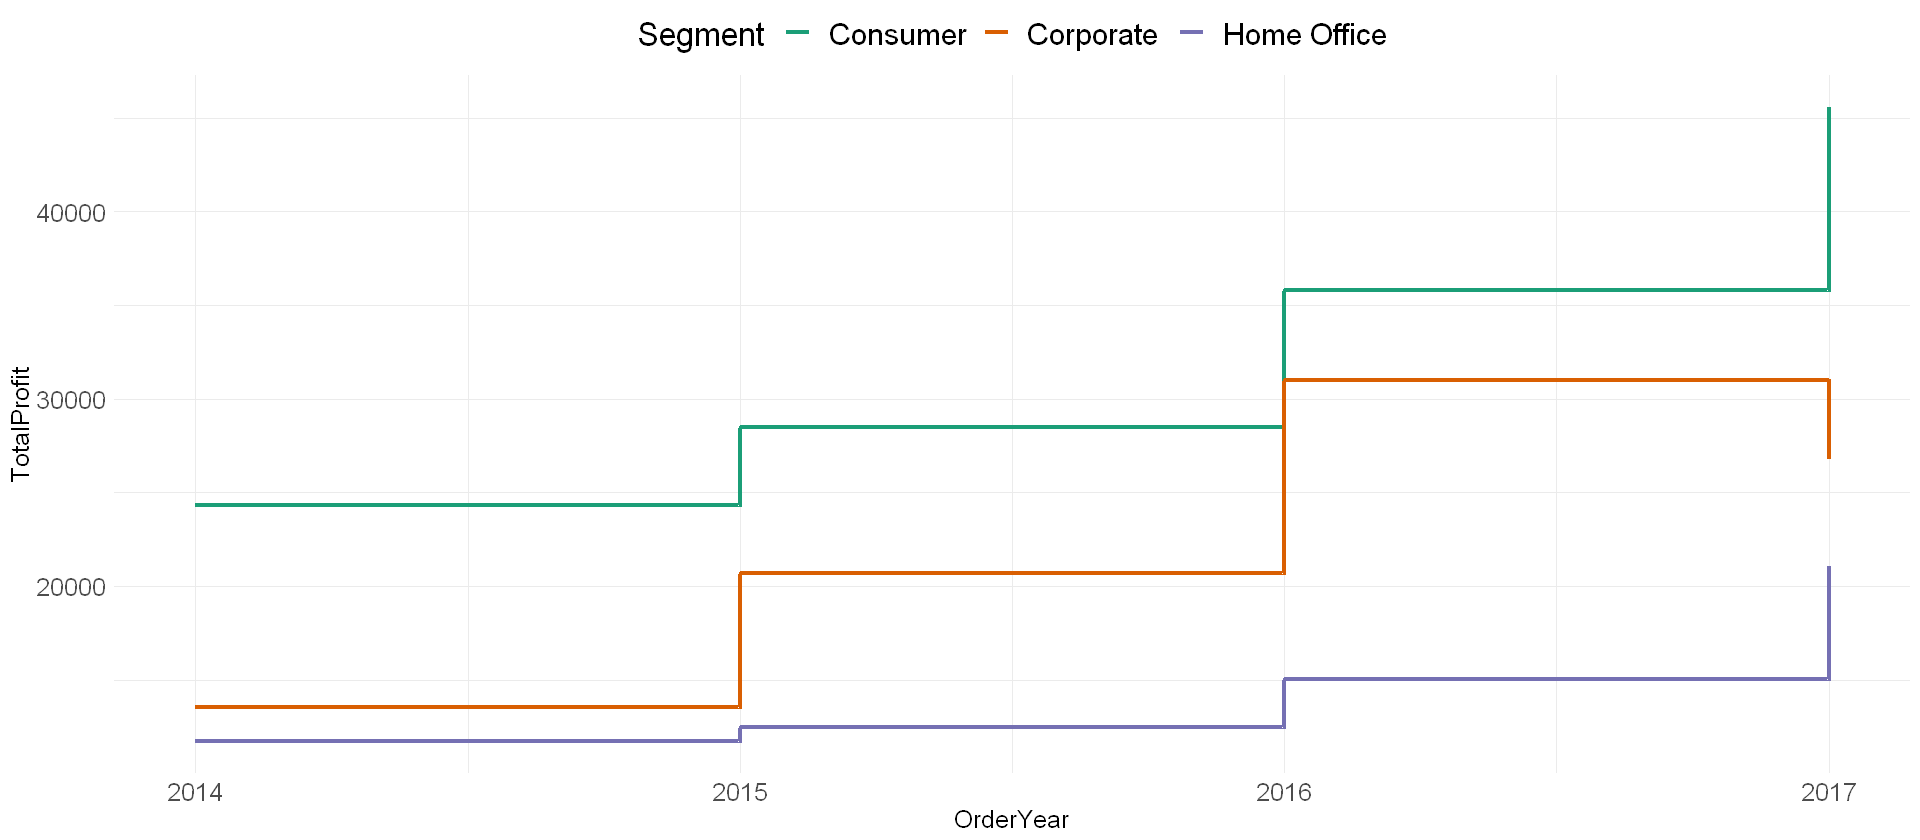

In [9]:
ggplot2::ggplot(data=superstorePrep, ggplot2::aes(x=OrderYear, y=TotalProfit, group=Segment)) +
    ggplot2::geom_step(linetype='solid', size=1.2, ggplot2::aes(color=Segment)) +
    ggplot2::scale_color_brewer(palette='Dark2') +
    ggplot2::theme_minimal() +
    ggplot2::theme(legend.position='top', 
                   legend.title=ggplot2::element_text(size=20), 
                   legend.text=ggplot2::element_text(size=18),
                   axis.text=ggplot2::element_text(size=15),
                   axis.title=ggplot2::element_text(size=15)
                  )

**End of code**